<a href="https://colab.research.google.com/github/antoinebachand/Derivatives-and-risk-management/blob/main/Multivariate_normal_simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 3 Derivative (Multivariate Normal model)


In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Real Data

In [34]:
# Get the data
df1 = pd.read_csv("bmw.csv")
df2 = pd.read_csv("siemens.csv")

In [35]:
# Create Log return 
log_returns = np.log(df1["Close"]) - np.log(df1["Close"].shift(1))
df1 = df1.assign(log_returns=log_returns)

log_returns = np.log(df2["Close"]) - np.log(df2["Close"].shift(1))
df2 = df2.assign(log_returns=log_returns)

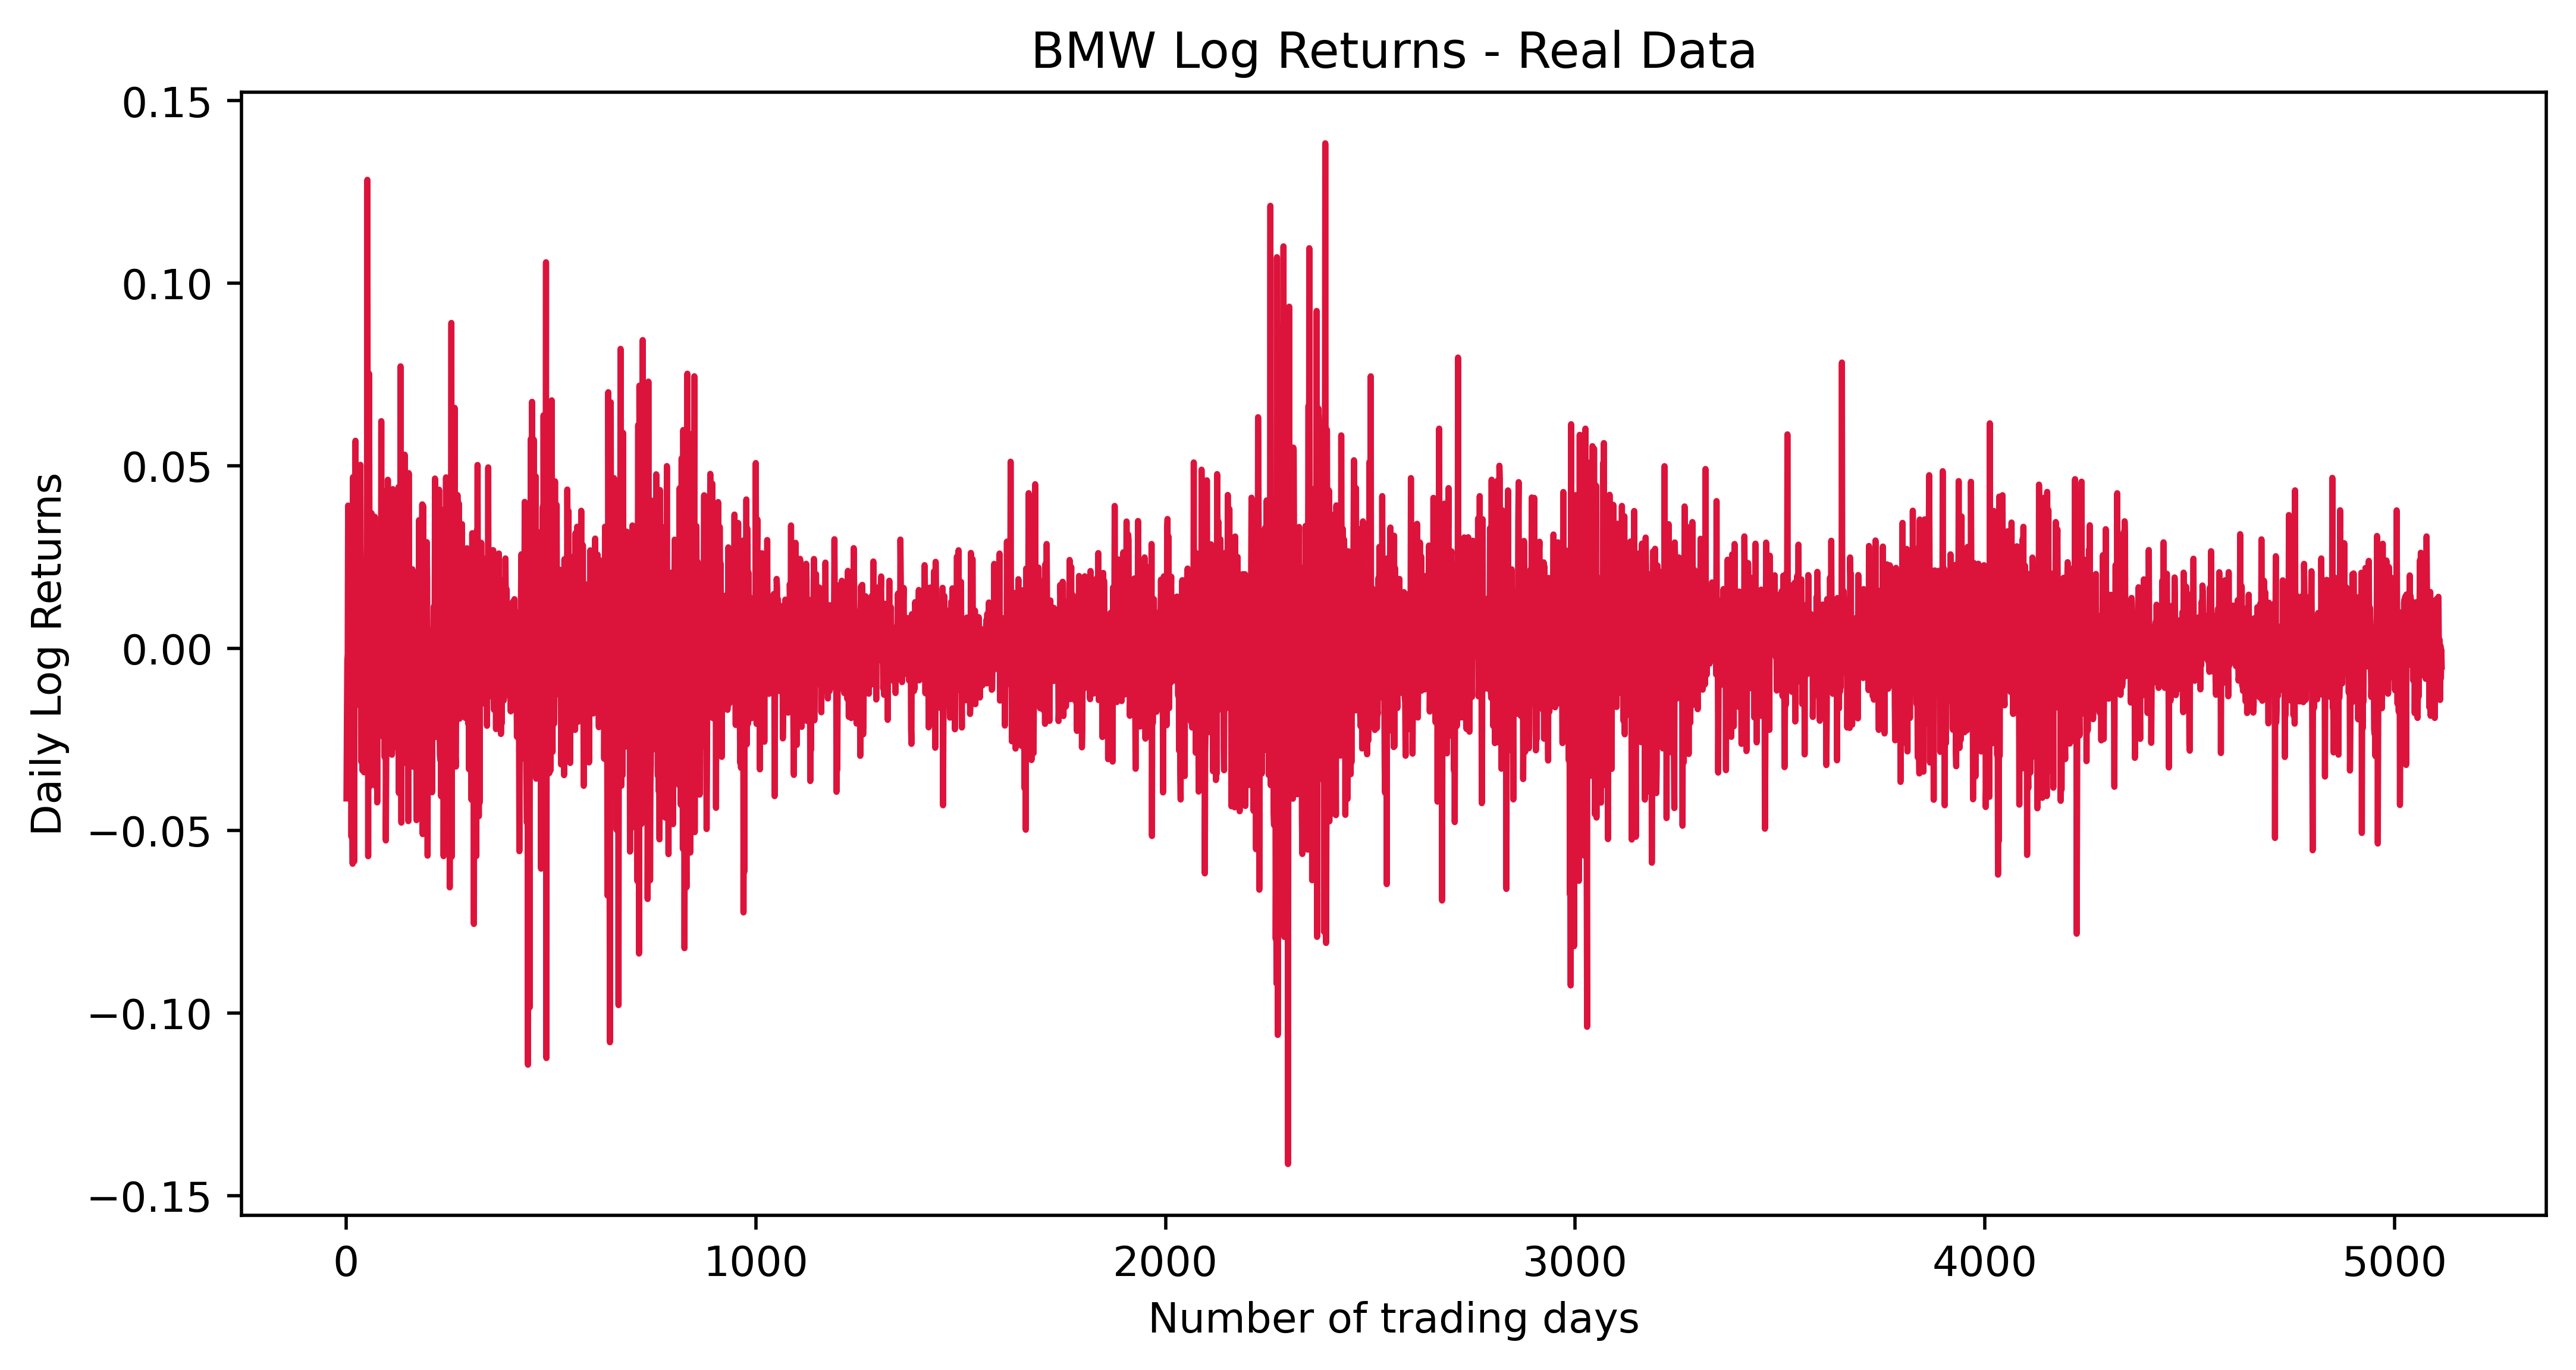

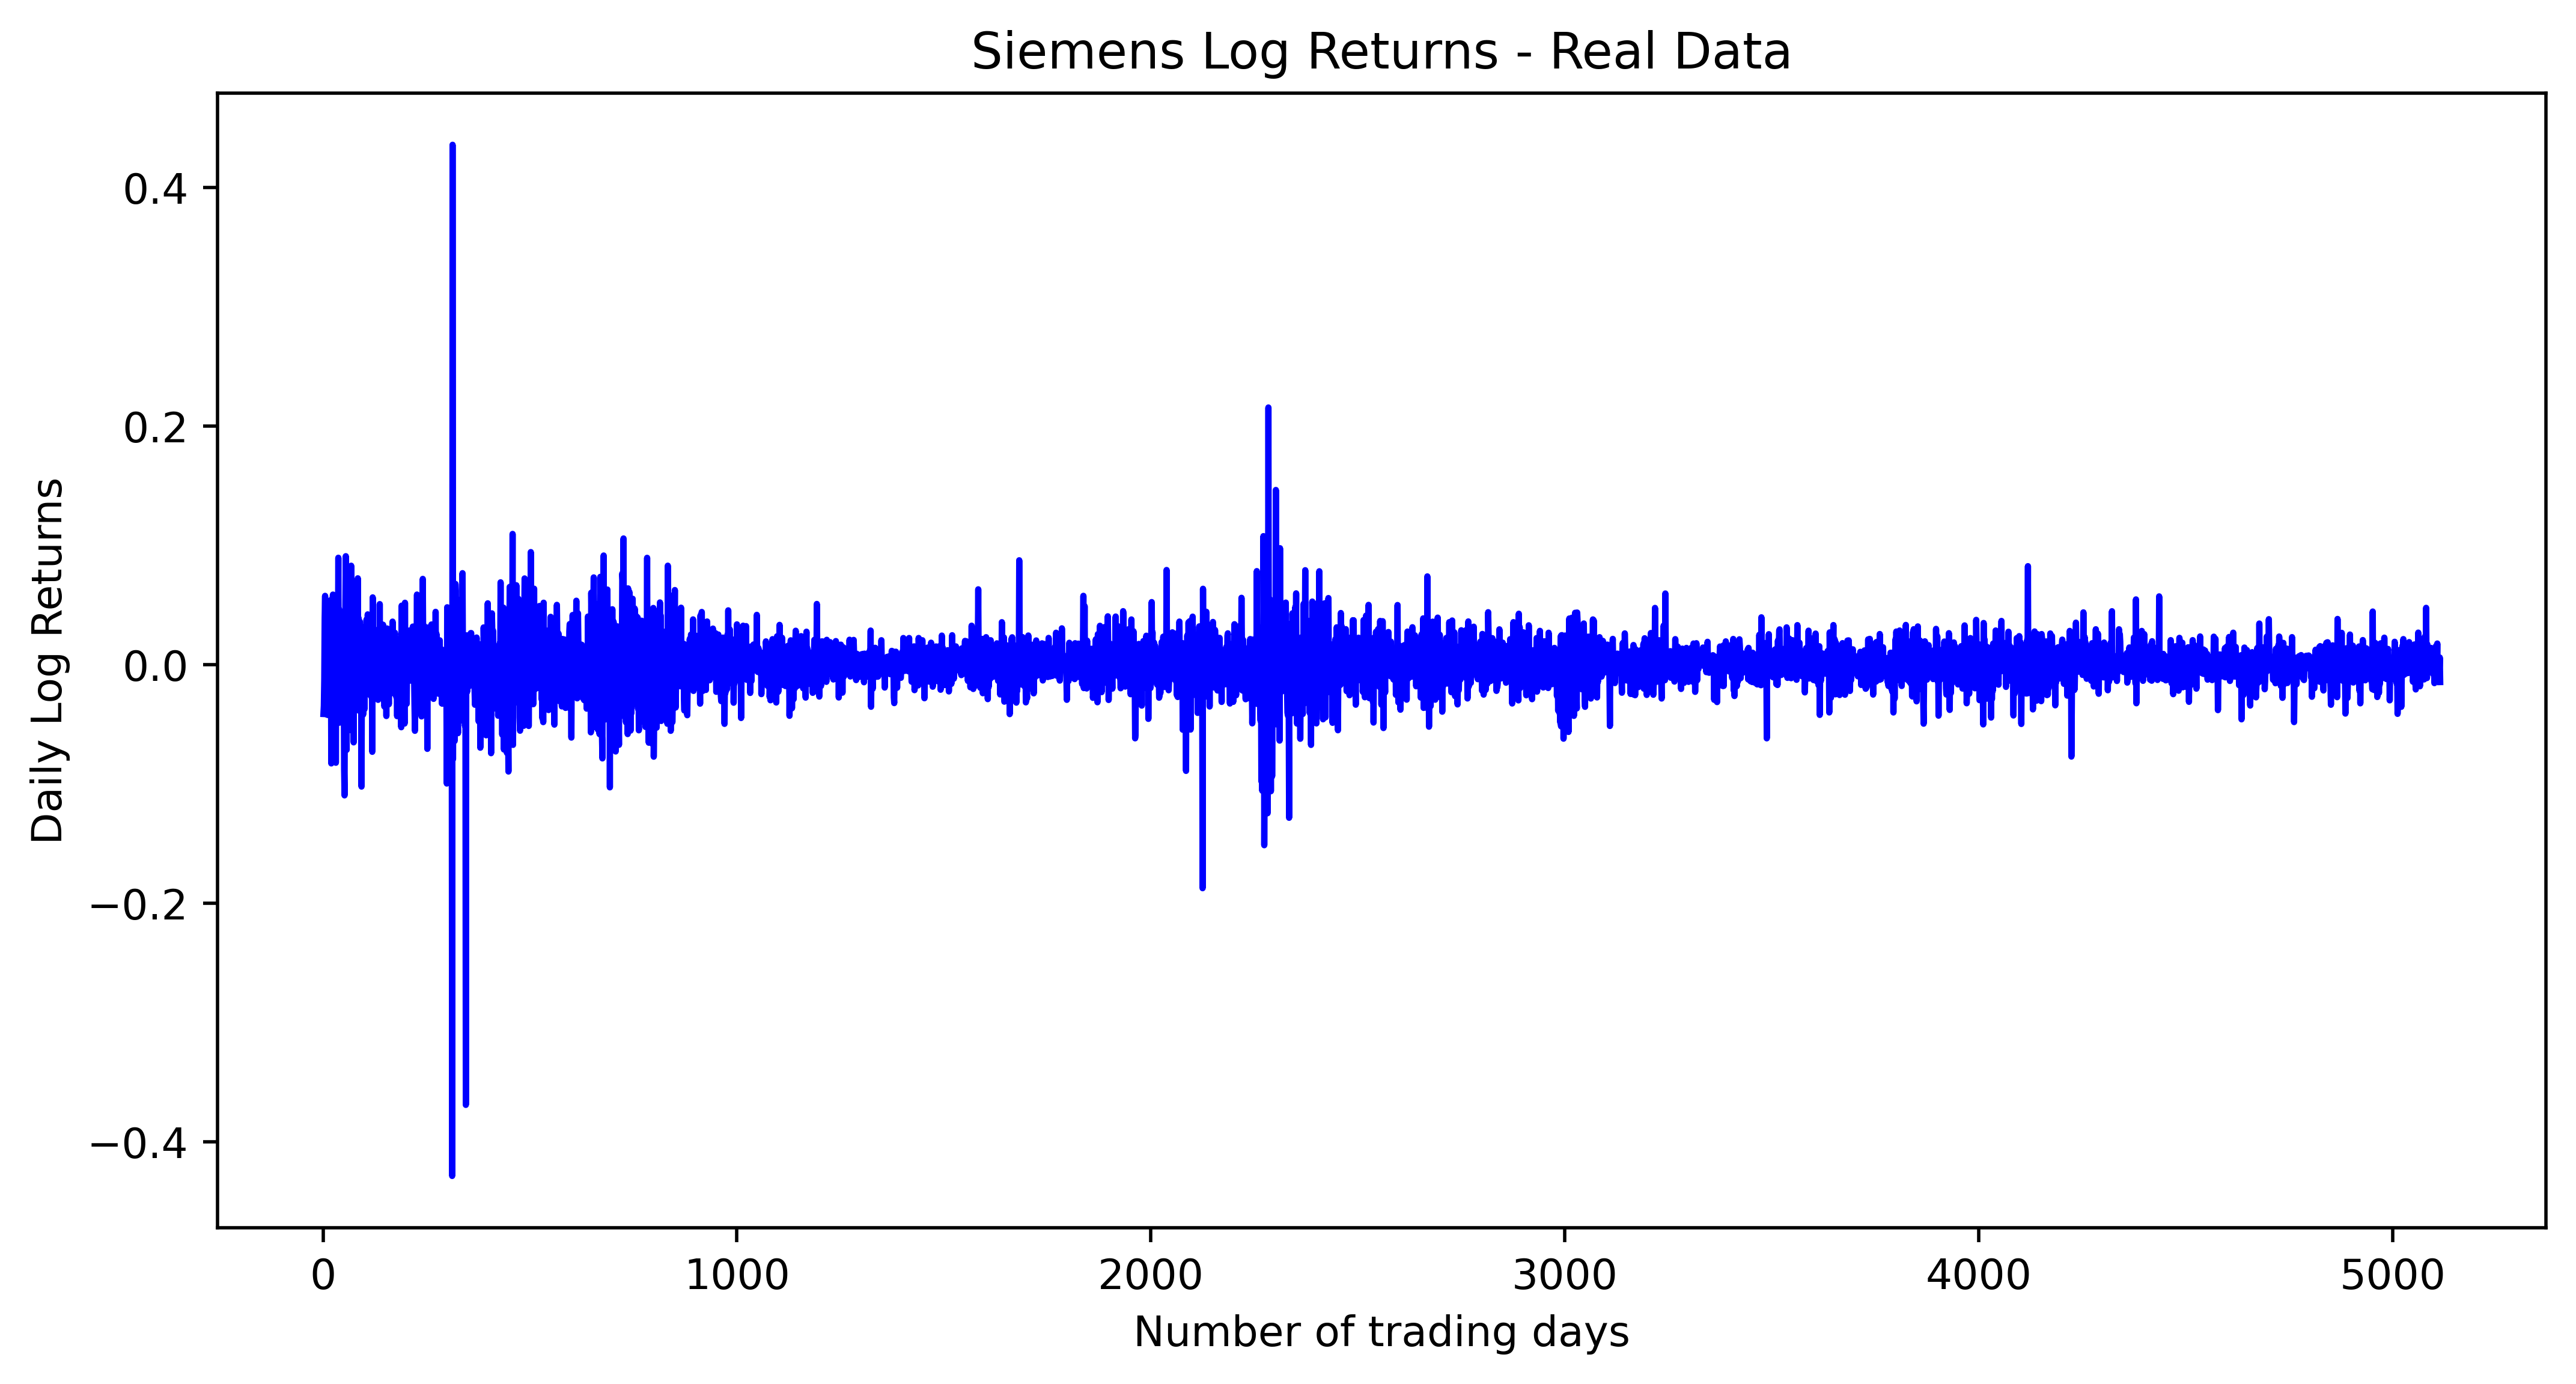

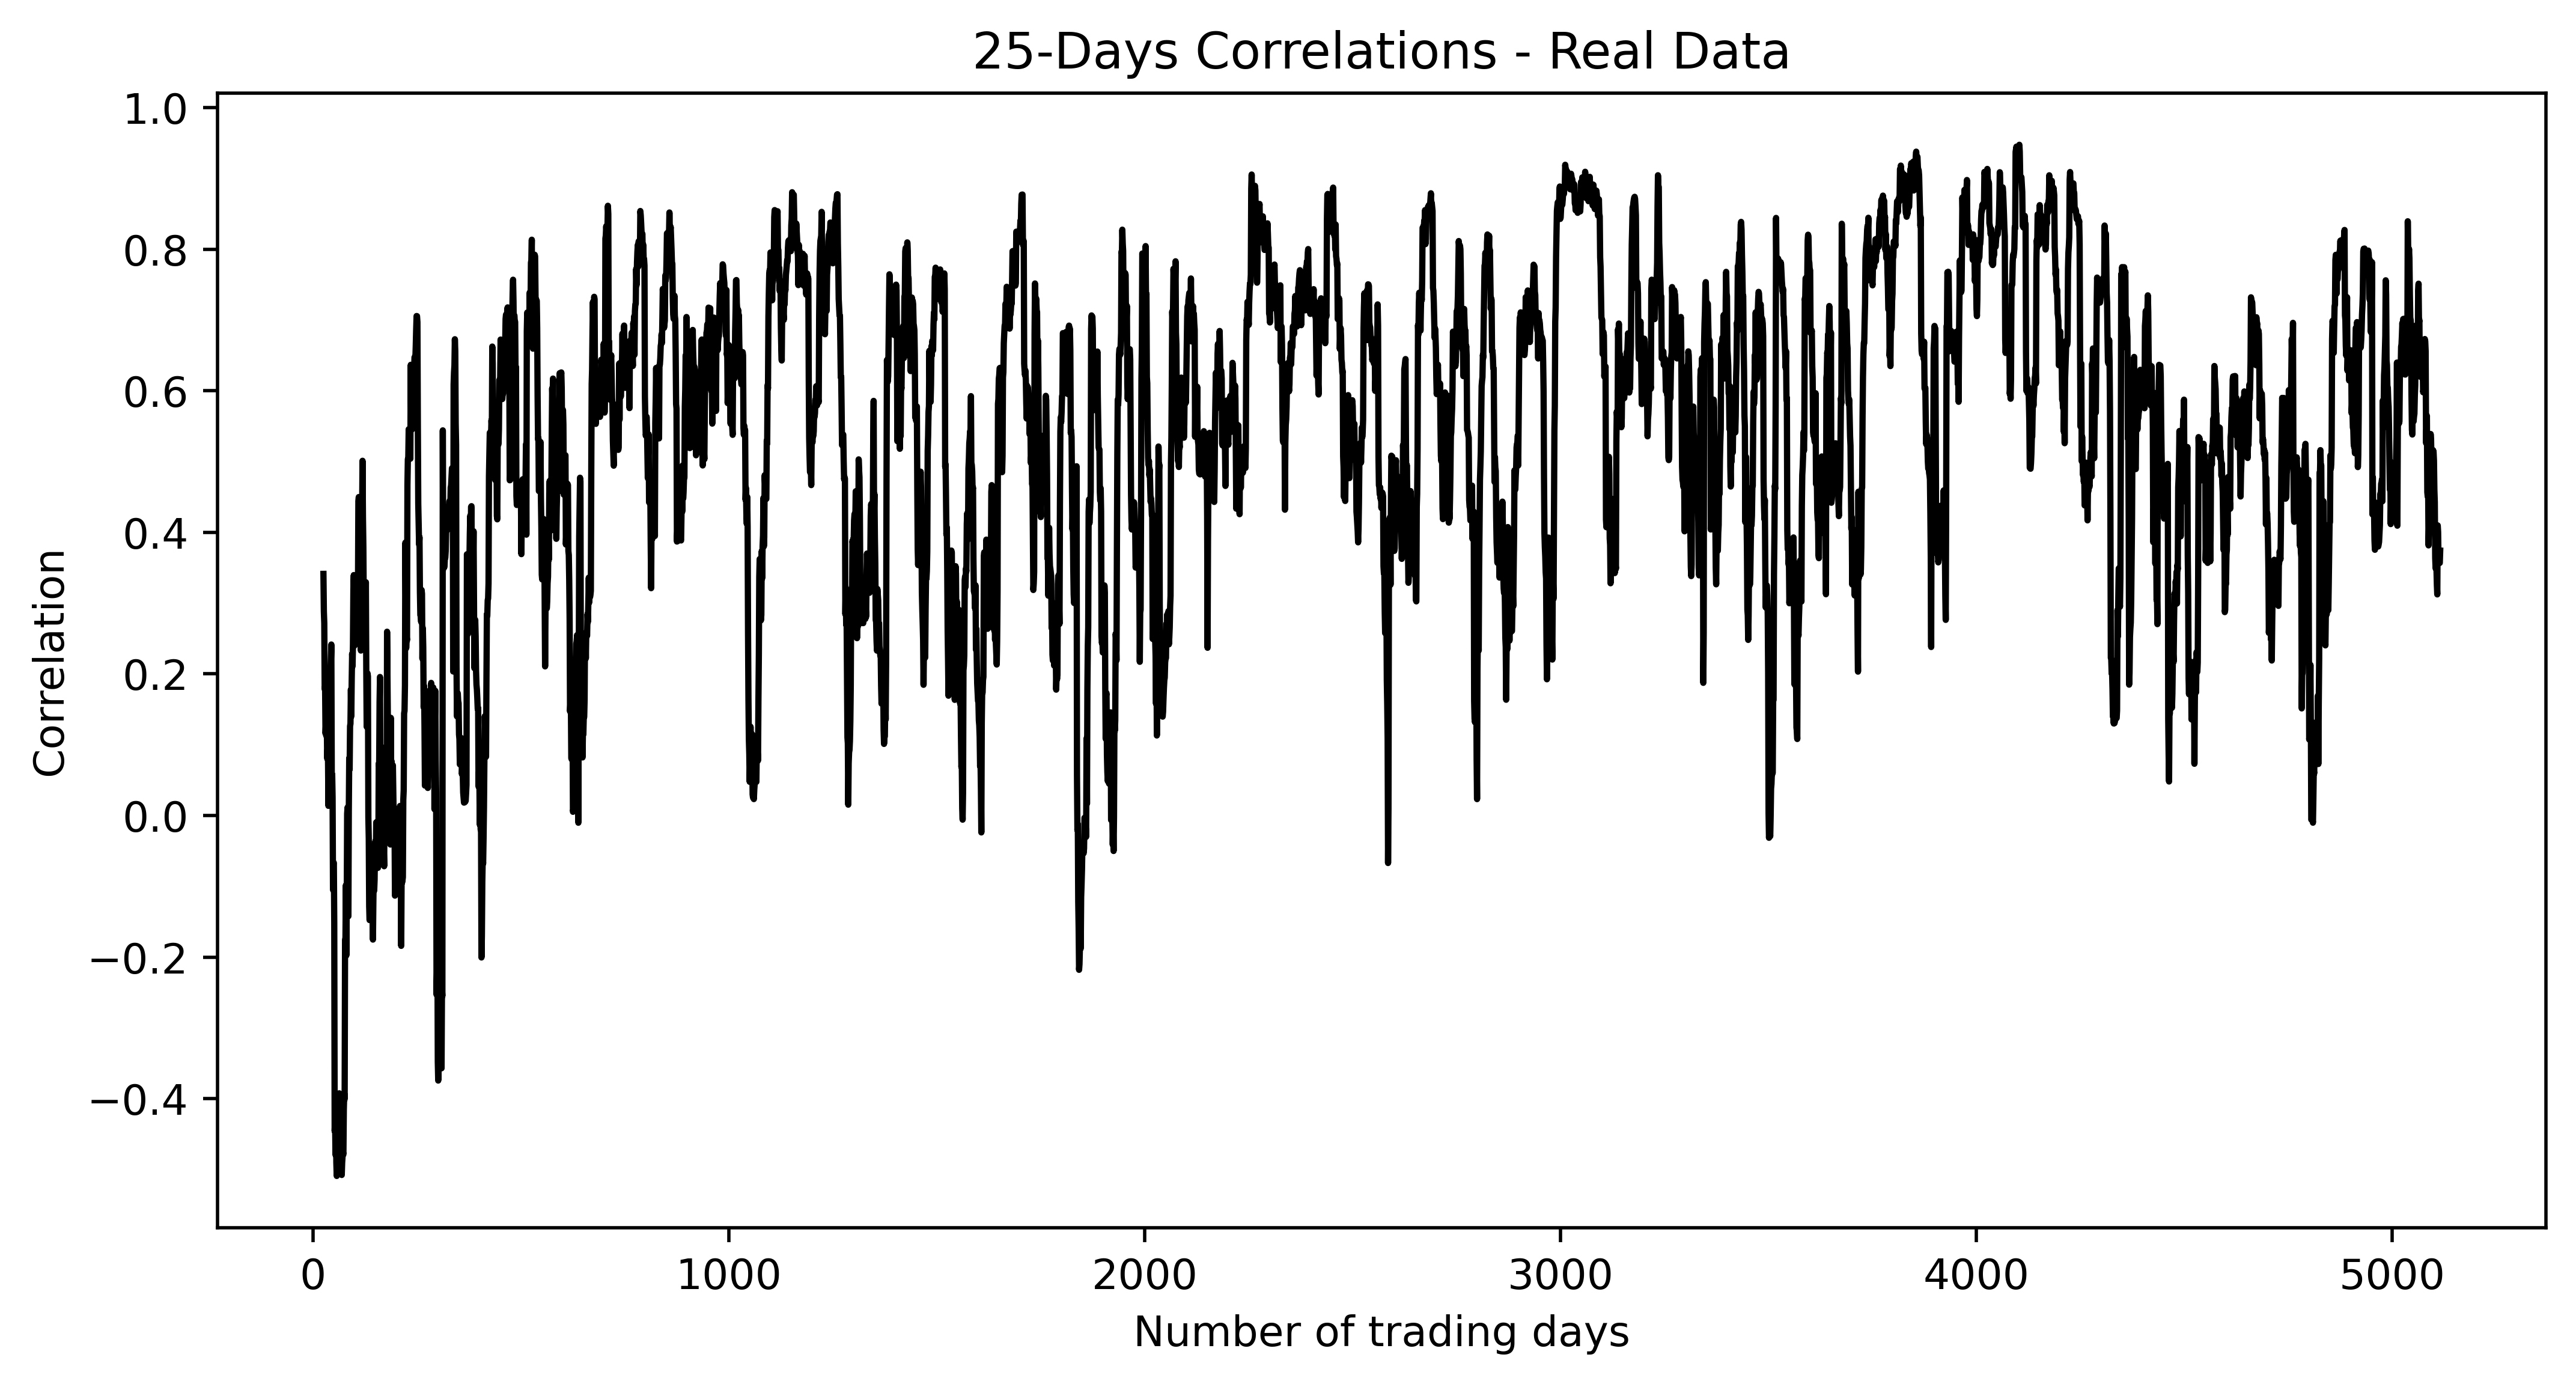

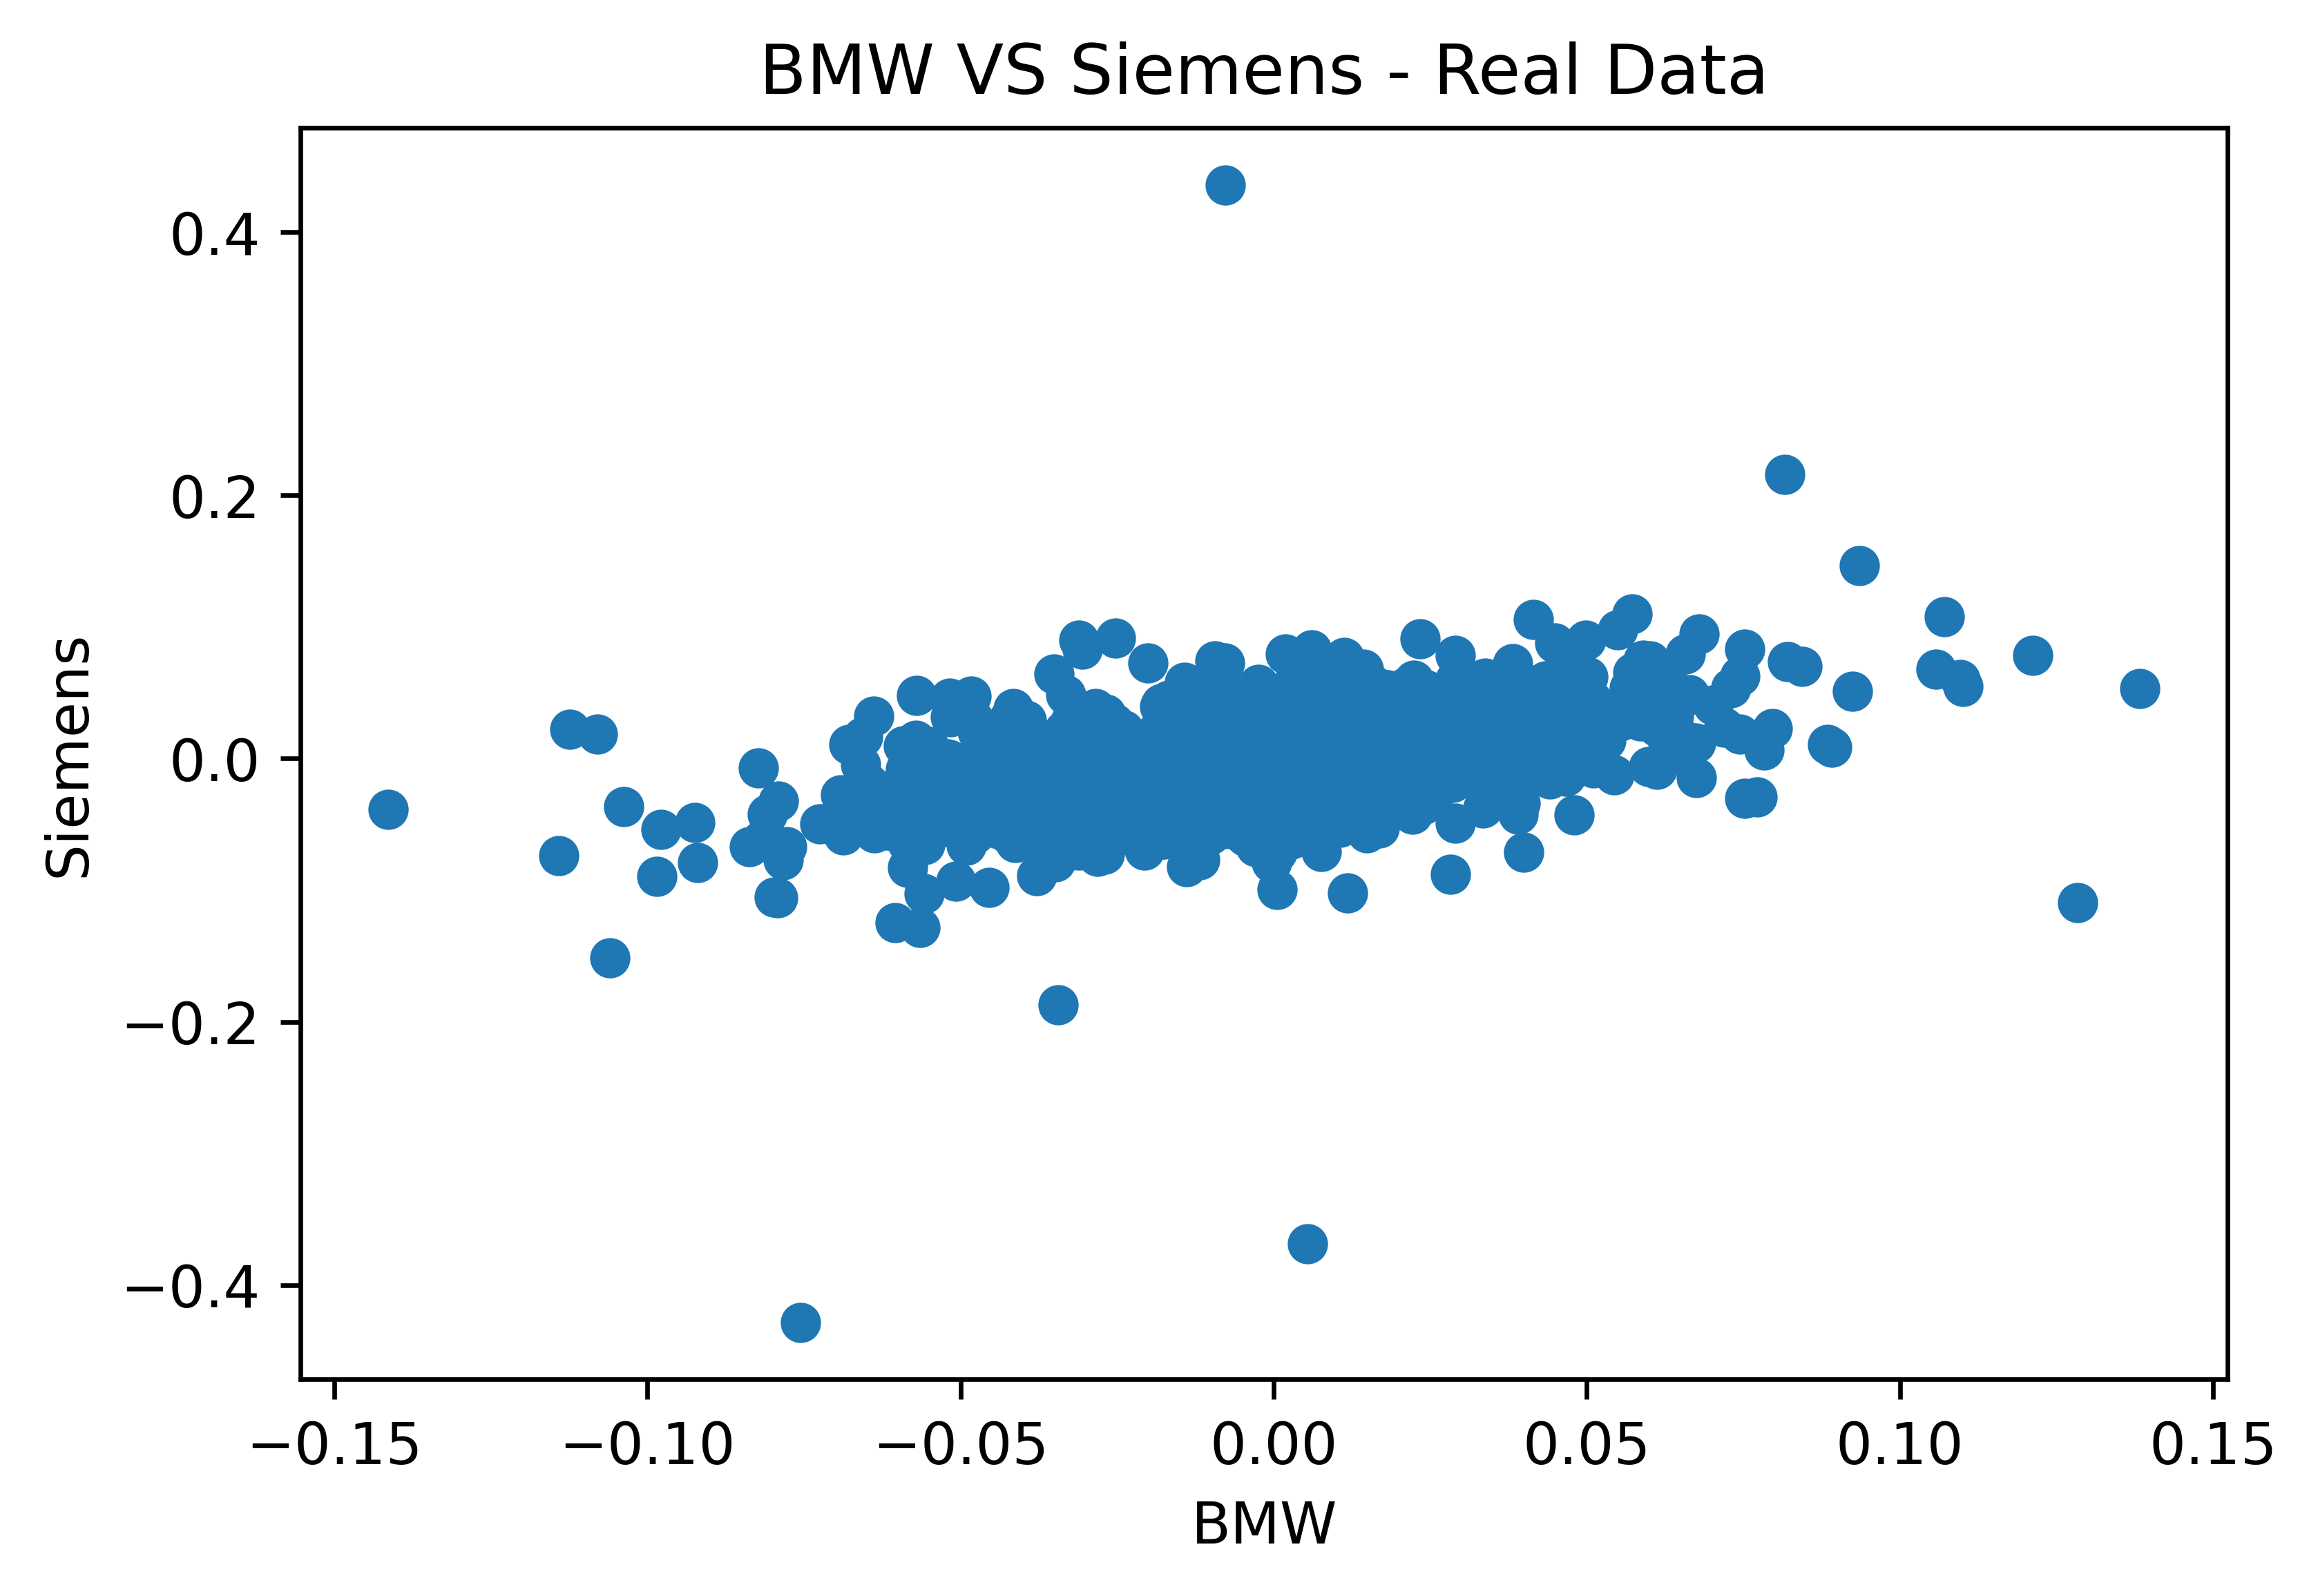

In [36]:
# Plot Real Data 

#BMW Log returns
fig,ax = plt.subplots(dpi=500, figsize=(10, 5))
ax.plot(df1.log_returns, 'crimson')
ax.set_xlabel('Number of trading days')
ax.set_ylabel('Daily Log Returns')
ax.set_title('BMW Log Returns - Real Data')
plt.show() 

#Siemens Log returns 
fig,ax = plt.subplots(dpi=500, figsize=(10, 5))
ax.plot(df2.log_returns, 'b')
ax.set_xlabel('Number of trading days')
ax.set_ylabel('Daily Log Returns')
ax.set_title('Siemens Log Returns - Real Data')
plt.show() 

# 25 Days Corelation
rolling_1 = df1.log_returns.rolling(25).corr(df2.log_returns)
fig,ax = plt.subplots(dpi=500, figsize=(10, 5))
ax.plot(rolling_1, 'k')
ax.set_xlabel('Number of trading days')
ax.set_ylabel('Correlation')
ax.set_title('25-Days Correlations - Real Data')
plt.show() 

# Scatter plot
plt.scatter(df1.log_returns,df2.log_returns)
plt.xlabel('BMW')
plt.ylabel('Siemens')
plt.title('BMW VS Siemens - Real Data')
plt.gcf().set_dpi(600)
plt.show()

# Multivariate Model

In [12]:
# Param setting 

bmw = df1.log_returns                    
bmw = bmw.tail(bmw.shape[0] -1)

siemens = df2.log_returns
siemens = siemens.tail(siemens.shape[0] -1)

random_seed=1000
cov = np.cov(bmw, siemens)
μ = [bmw.mean(), siemens.mean()]
print(cov)


[[0.00041828 0.00023218]
 [0.00023218 0.00053455]]


In [28]:
# Create the simulation
x = np.random.multivariate_normal(cov = cov, mean = μ, size = len(bmw))
df = pd.DataFrame(x, columns=['BMW', 'Siemiens'])
print(df)

           BMW  Siemiens
0    -0.017766  0.023619
1     0.031107  0.051835
2    -0.024774 -0.010983
3     0.000270  0.031730
4     0.018604  0.002866
...        ...       ...
5110 -0.006594  0.027339
5111 -0.041044 -0.016268
5112  0.019609  0.030550
5113  0.008010  0.005890
5114  0.029955  0.016467

[5115 rows x 2 columns]


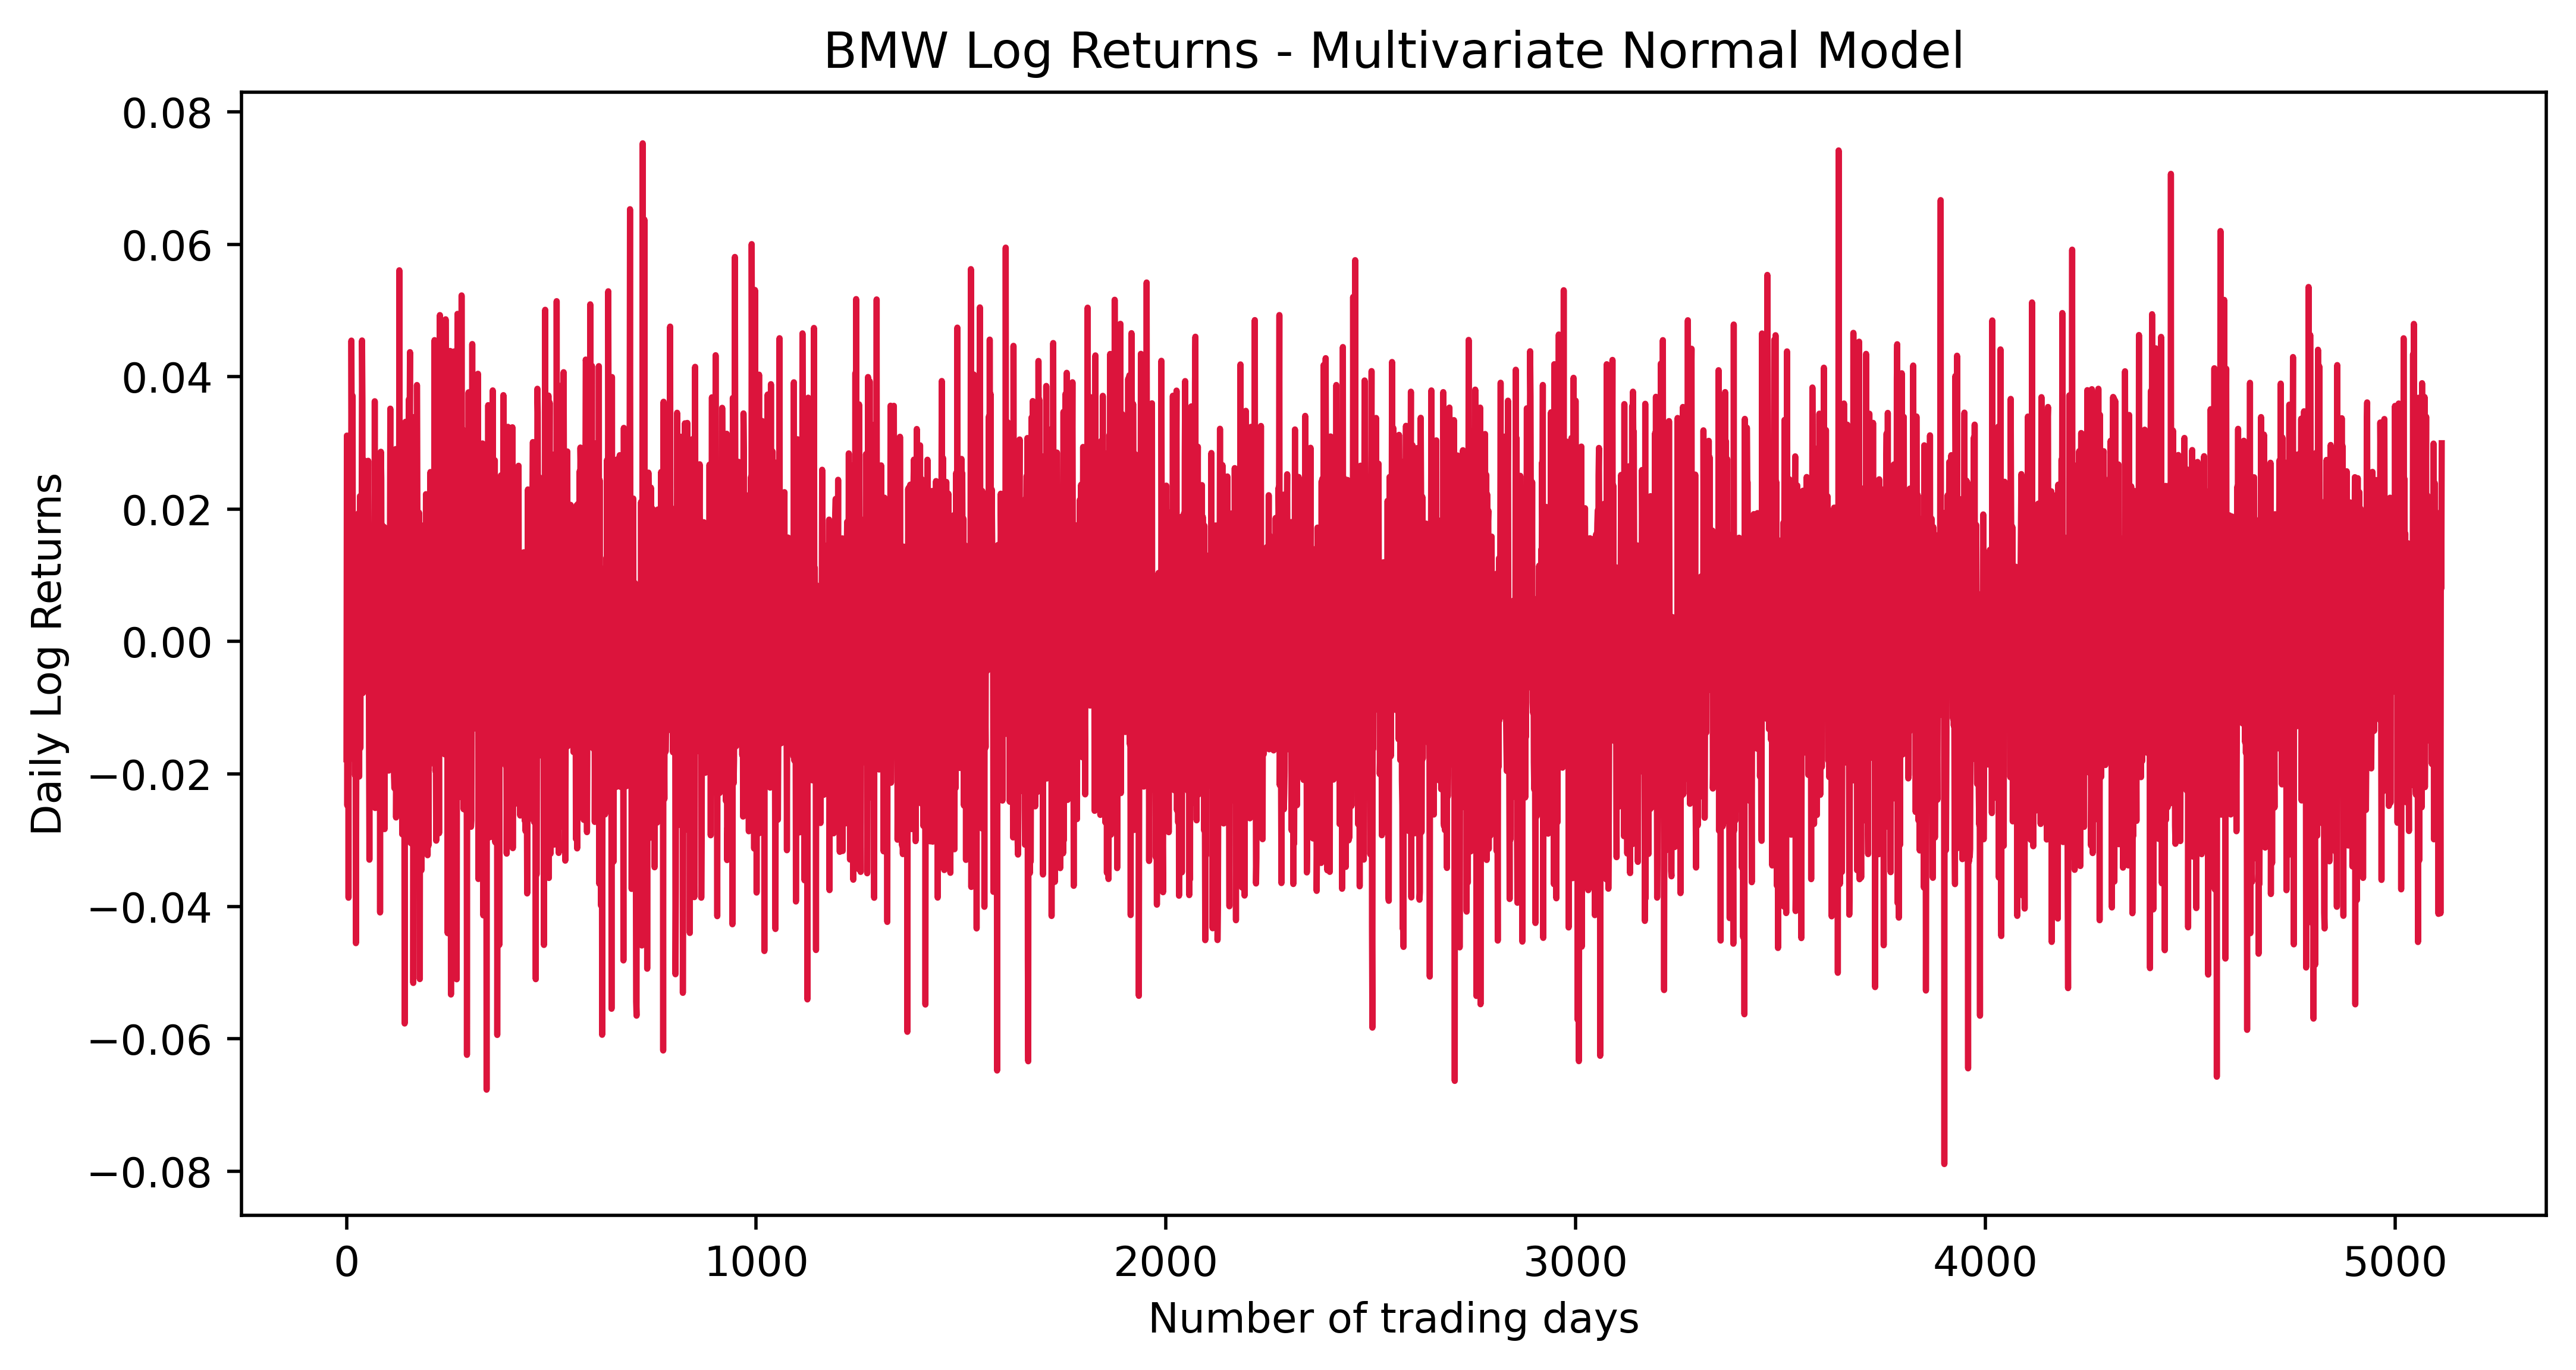

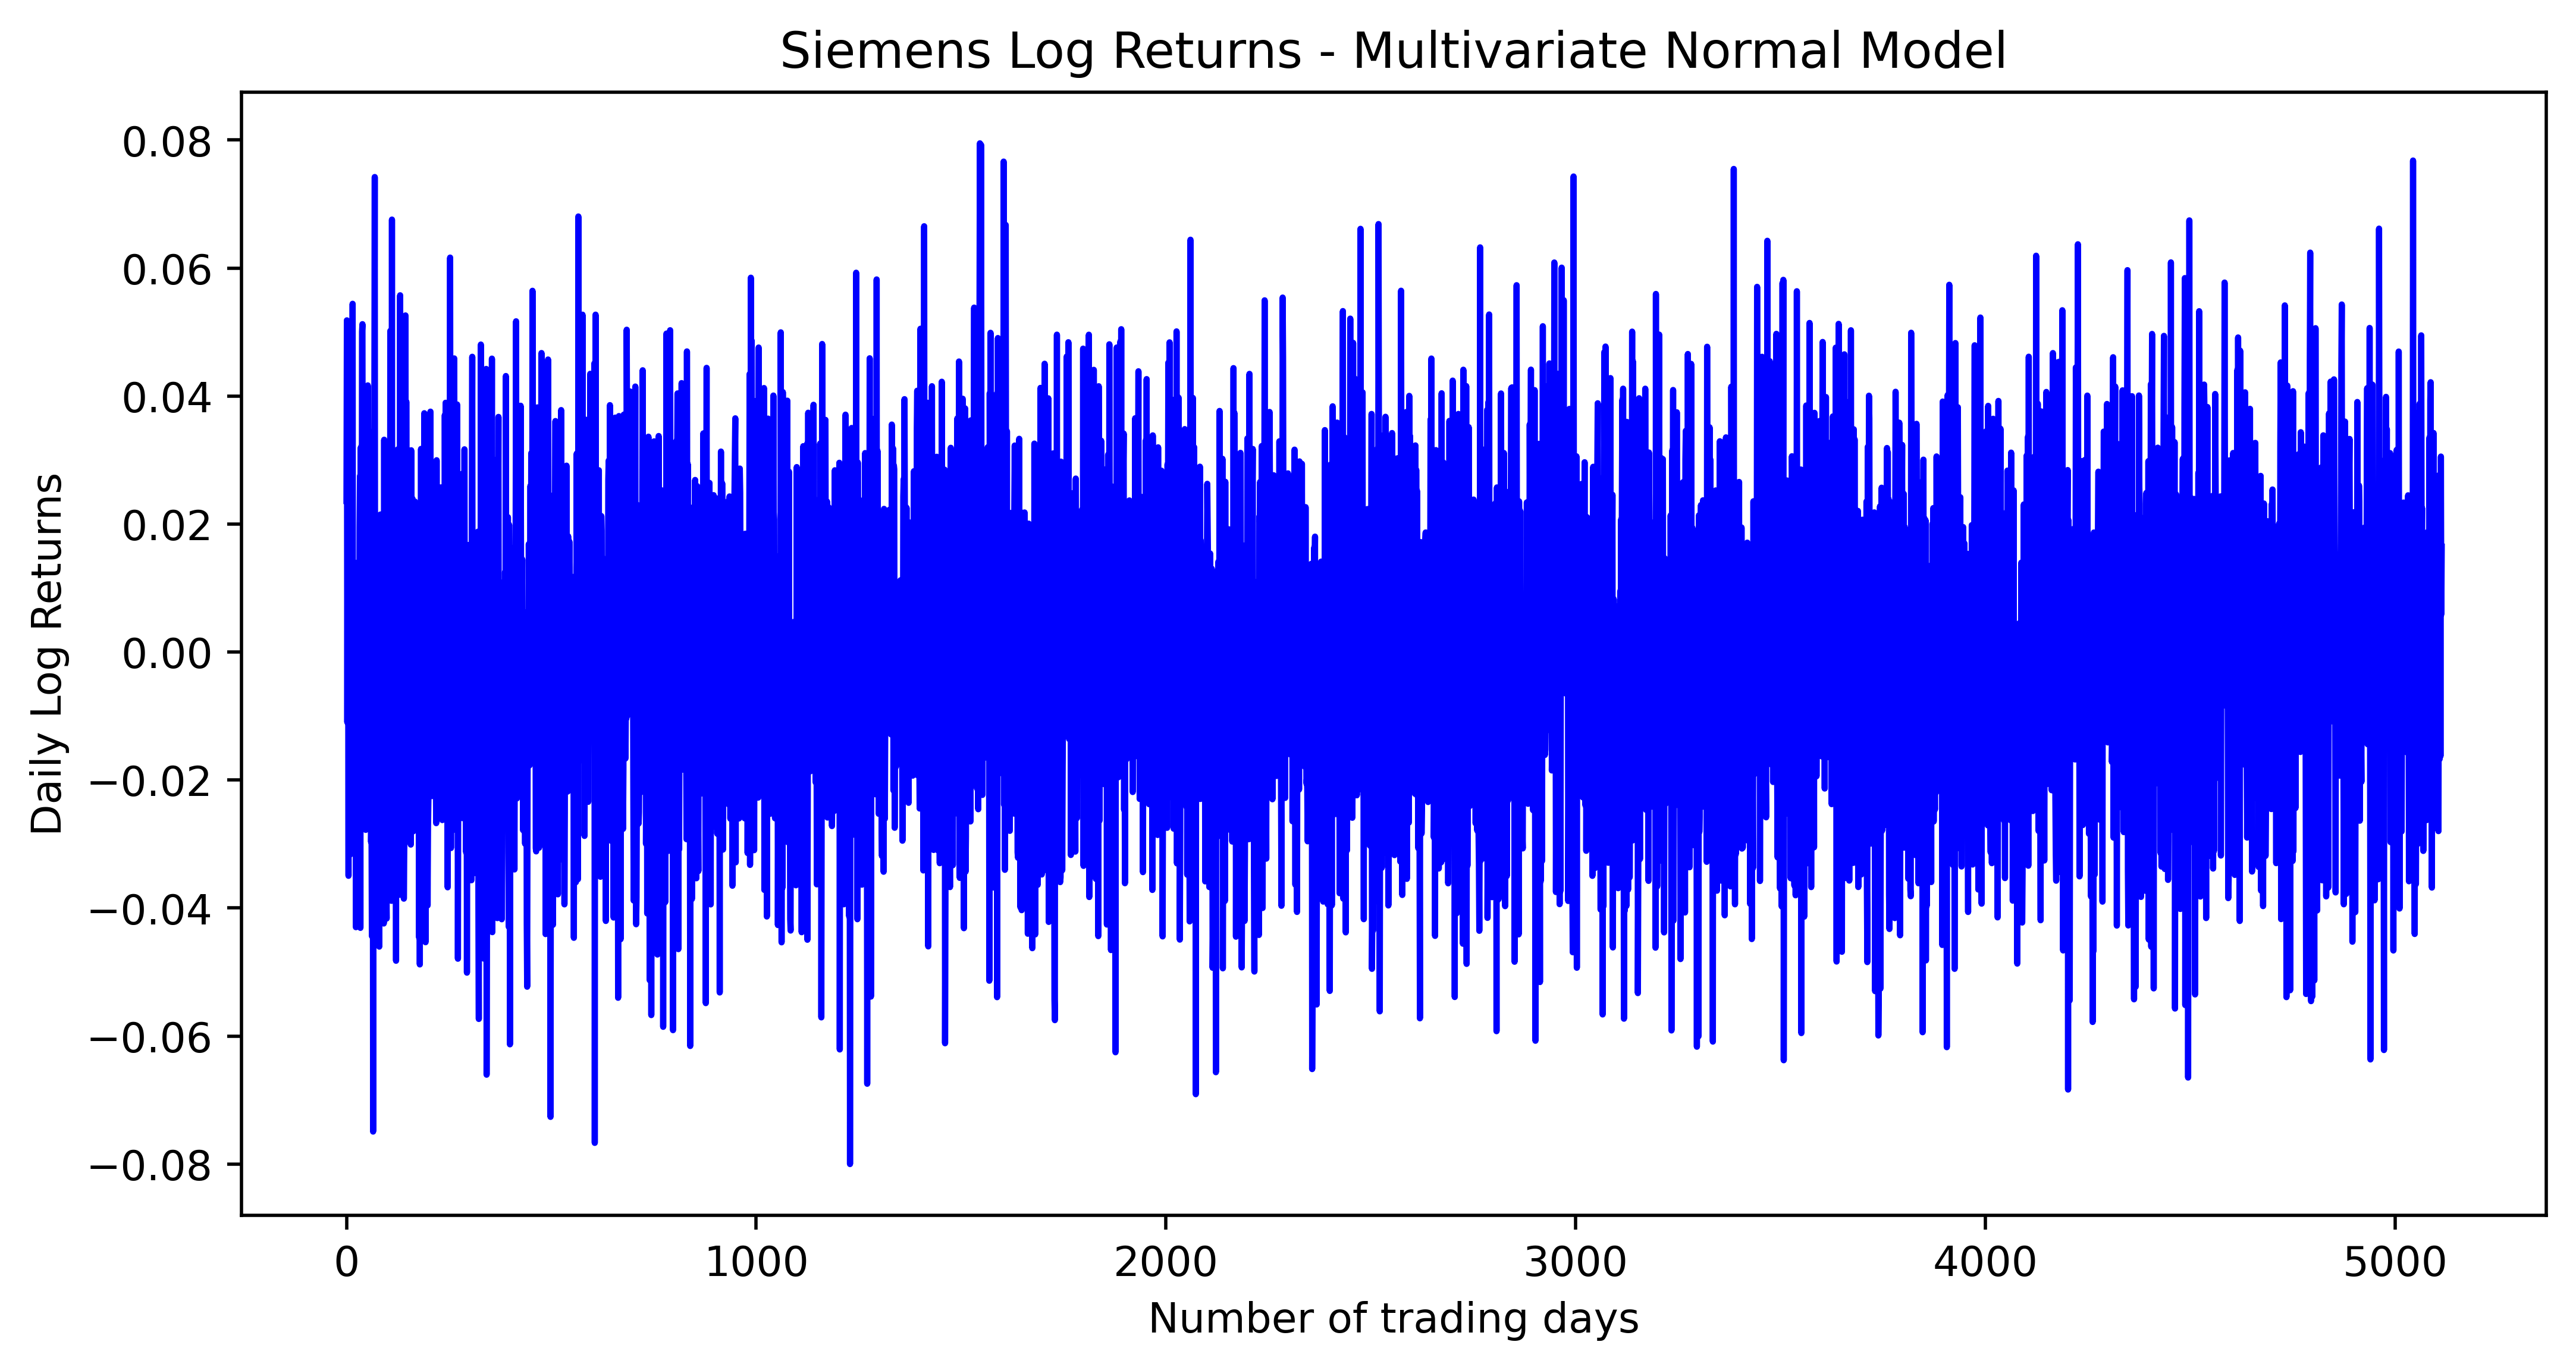

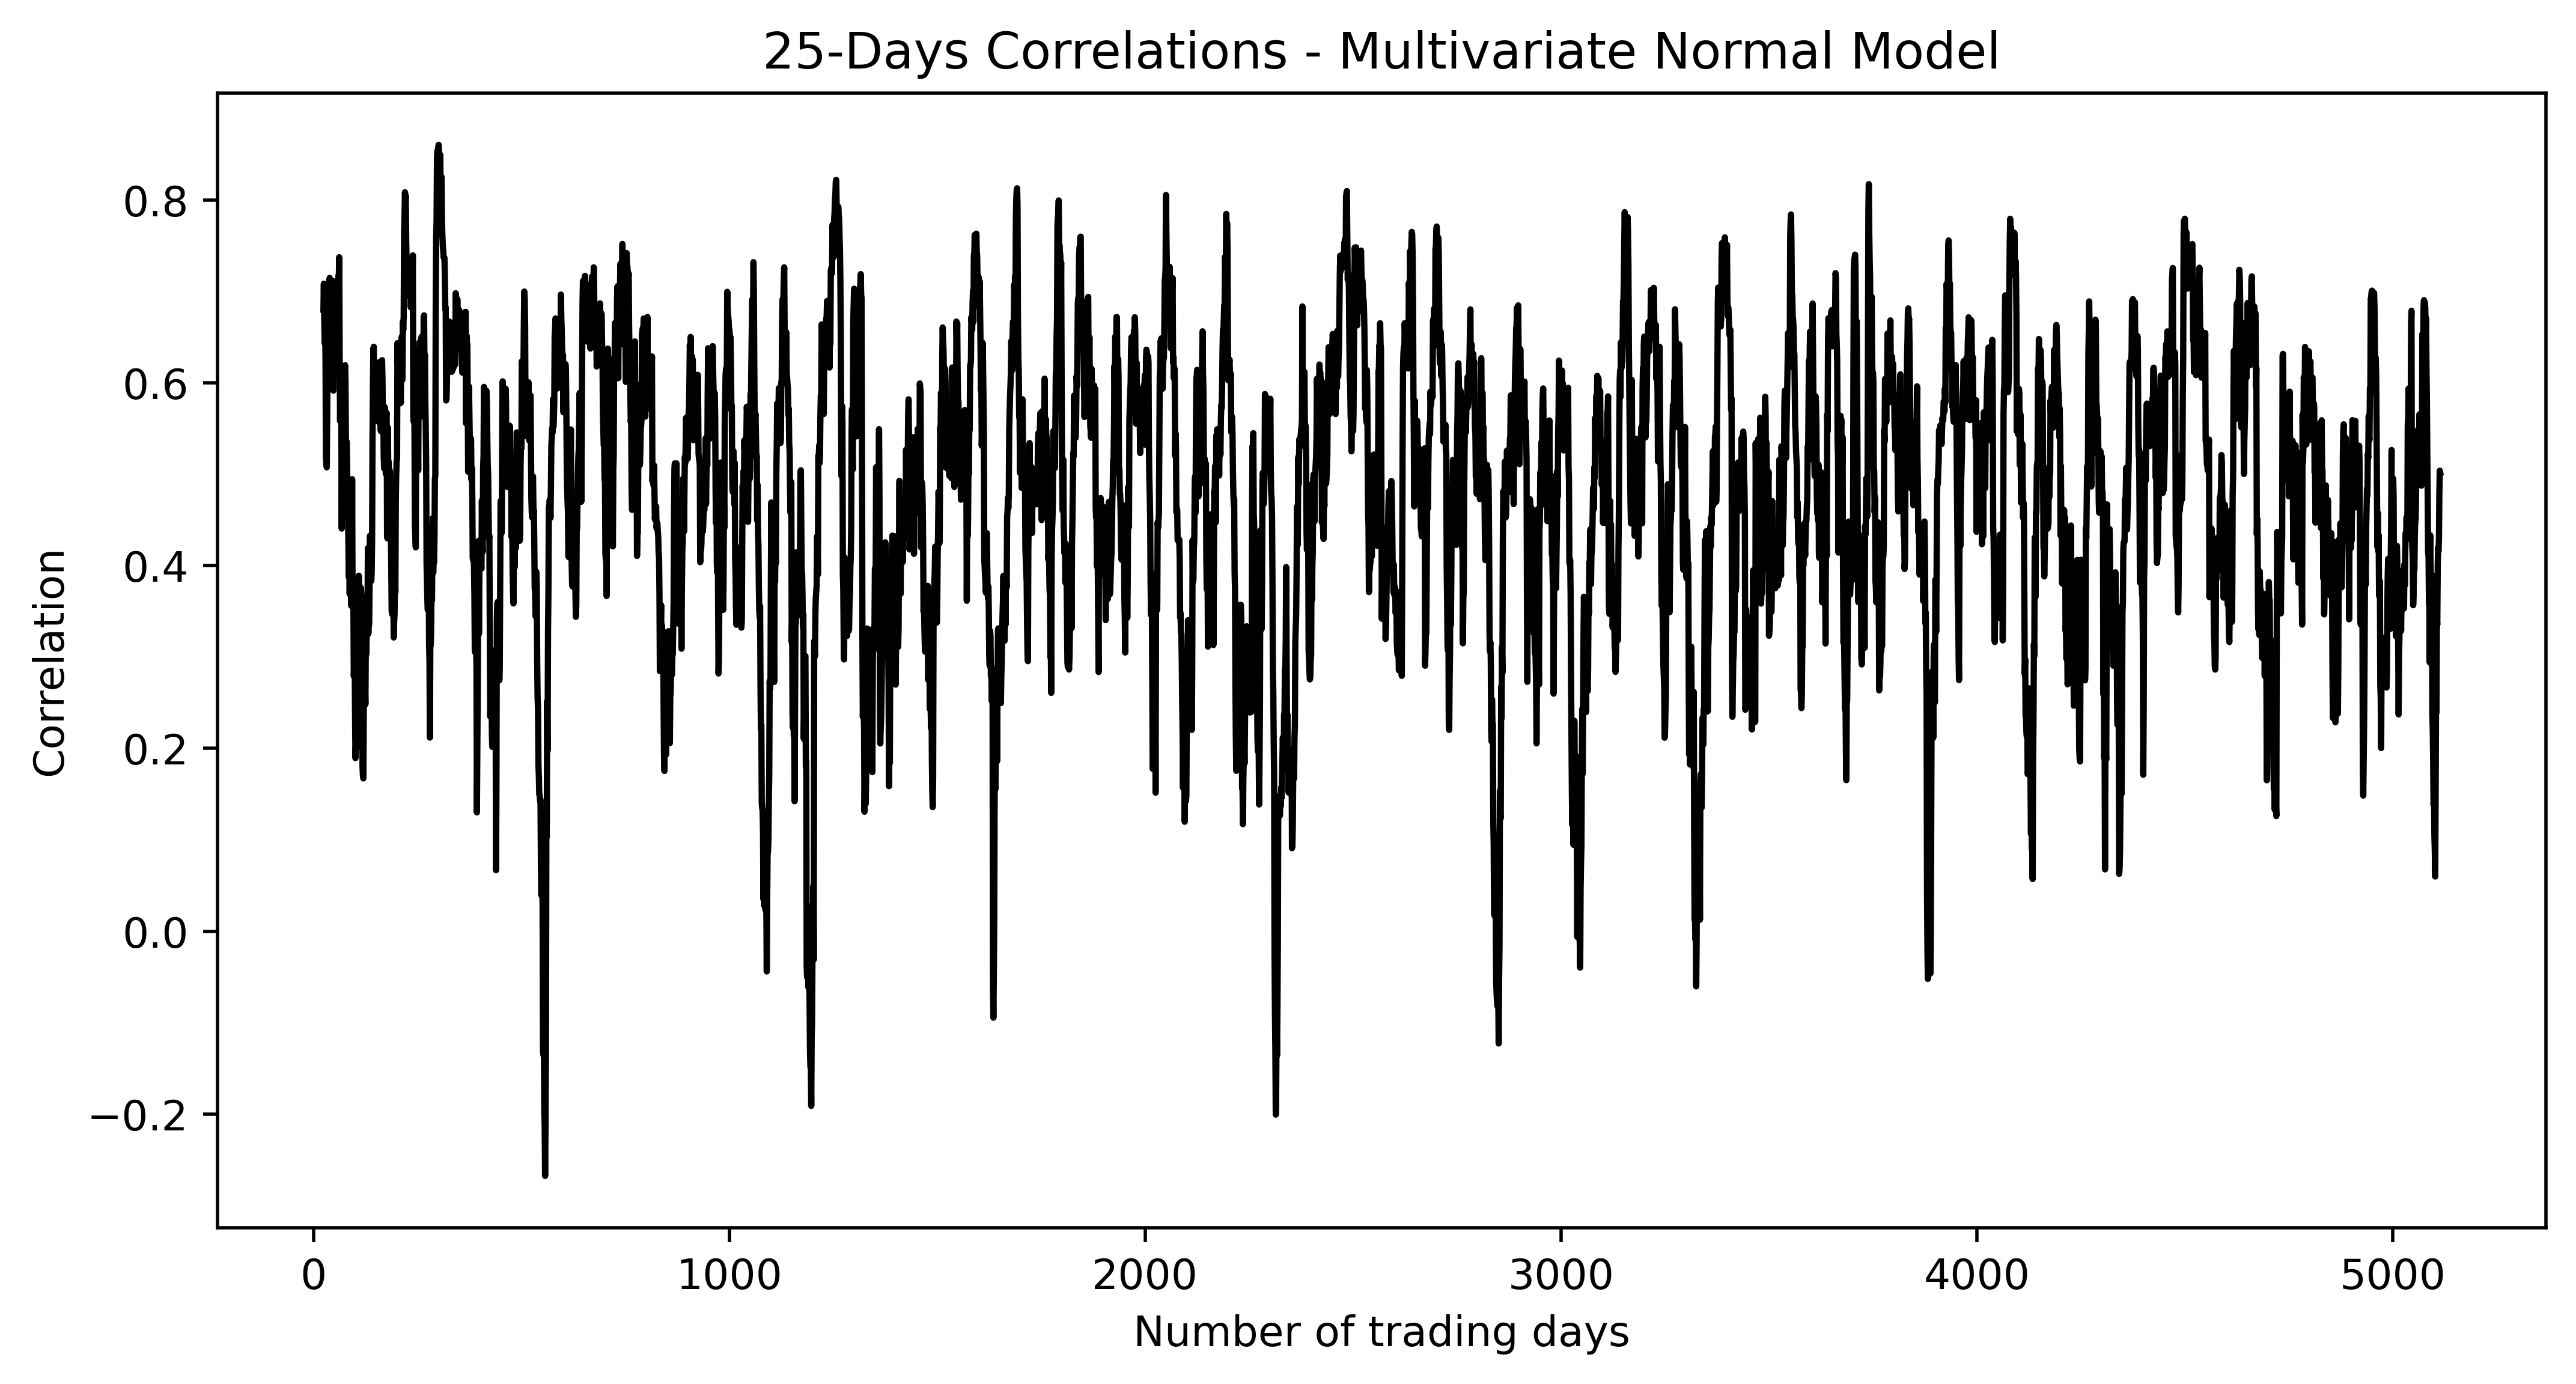

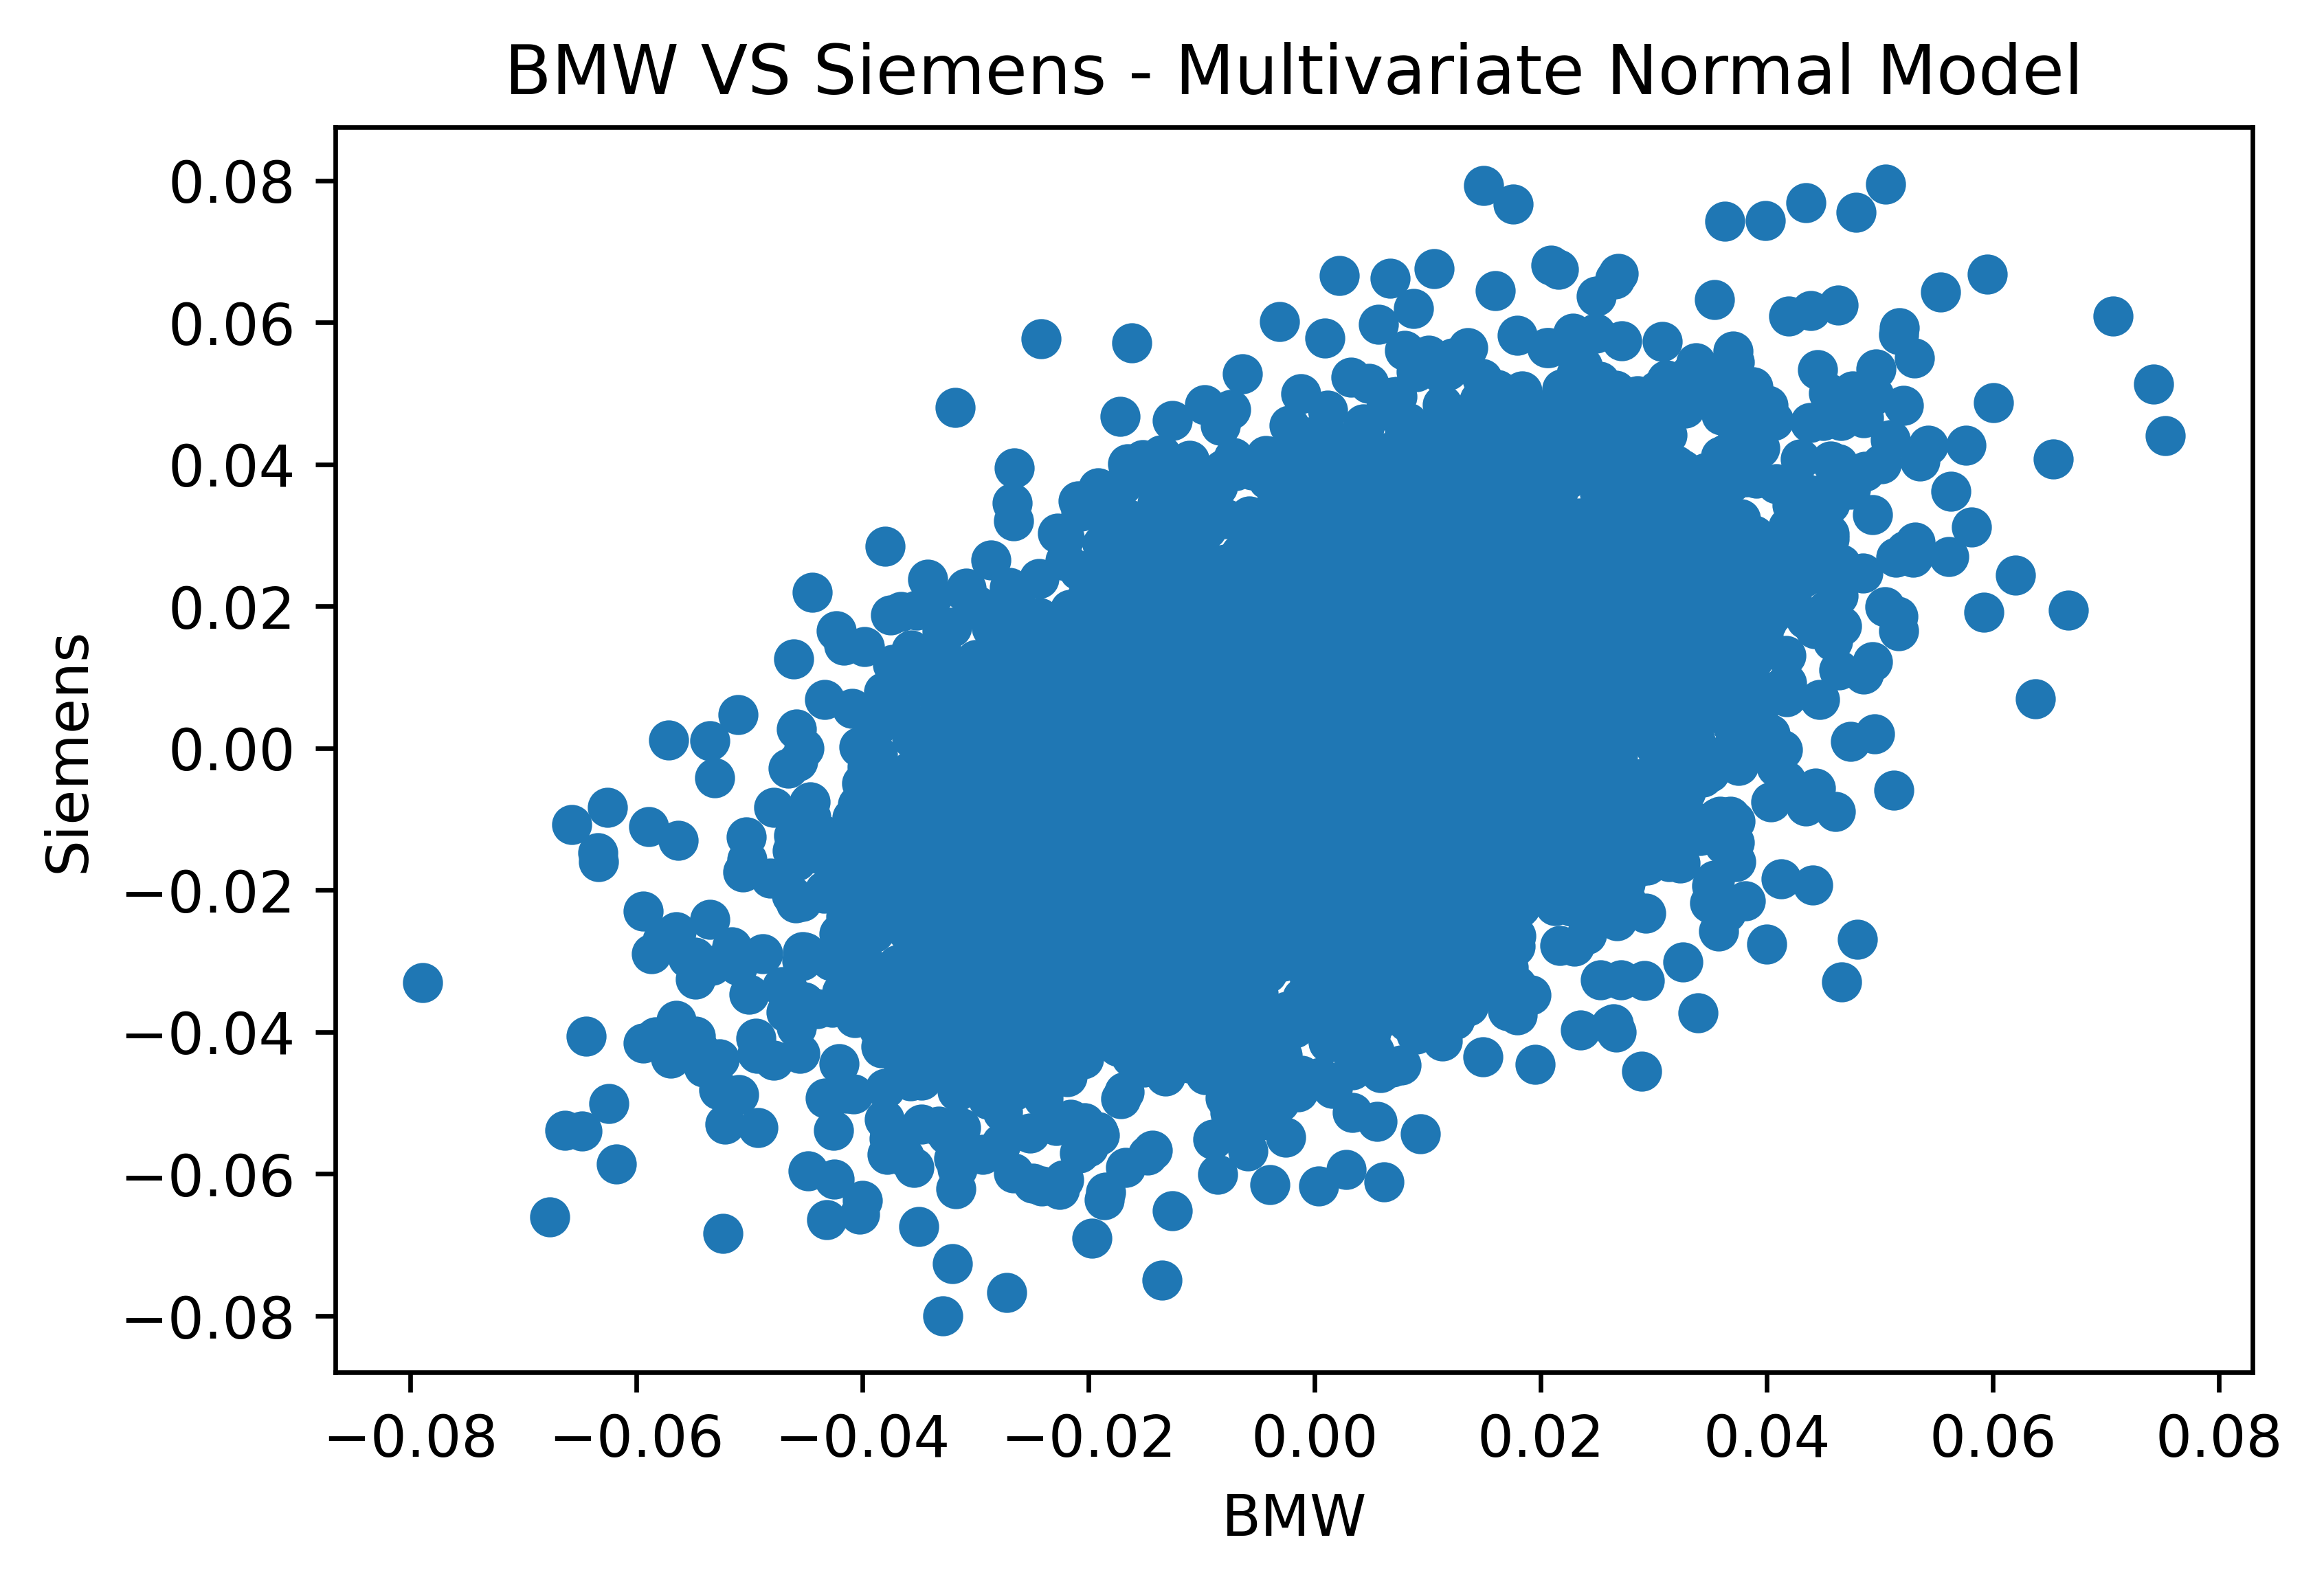

In [31]:
# Plot Real Data 

#BMW Log returns
fig,ax = plt.subplots(dpi=500, figsize=(10, 5))
ax.plot(df['BMW'], 'crimson')
ax.set_xlabel('Number of trading days')
ax.set_ylabel('Daily Log Returns')
ax.set_title('BMW Log Returns - Multivariate Normal Model')
plt.show() 

#Siemens Log returns 
fig,ax = plt.subplots(dpi=500, figsize=(10, 5))
ax.plot(df['Siemiens'], 'b')
ax.set_xlabel('Number of trading days')
ax.set_ylabel('Daily Log Returns')
ax.set_title('Siemens Log Returns - Multivariate Normal Model')
plt.show() 

# 25 Days Corelation
rolling_1 = df['BMW'].rolling(25).corr(df['Siemiens'])
fig,ax = plt.subplots(dpi=500, figsize=(10, 5))
ax.plot(rolling_1, 'k')
ax.set_xlabel('Number of trading days')
ax.set_ylabel('Correlation')
ax.set_title('25-Days Correlations - Multivariate Normal Model')
plt.show() 

# Scatter plot
plt.scatter(df['BMW'], df['Siemiens'])
plt.xlabel('BMW')
plt.ylabel('Siemens')
plt.title('BMW VS Siemens - Multivariate Normal Model')
plt.gcf().set_dpi(600)
plt.show()

# Question 3


1.   The extreme returns of the real data are really under represented in the normal multivariate distribution. This aspect is very problematic for any risk management application or capital requirement calculation since it underestimates the occurrence of crashes, economic crisis or financial crisis.
2.   We notice that the correlation between the two stocks is underestimated in the multivariate model.  This difference is also problematic for a risk management application since it underestimates the fact that in a market crash stocks that normally have little correlation will often move together. Thus the hedging that would be calculated in this model would be less efficient and could lead to larger losses.  
3.   The presence of large volatility clusters in the real data is not represented in the multivariate simulation.  This is an important weakness of the model.  Indeed, a period following a crash includes a lot of volatility and this effect is not even taken into account. 
4.   A final weakness of the multivariate normal model is that it does not consider psychology or human behavior. For example, a period of significant positive gains often leads to further positive returns. Since investors tend to forget about the possibility of negative returns and watch their neighbors be successful, they are willing to invest in their turn.  
5.   Multivariate series of absolute returns shows evidence of cross correlation. Indeed we can notice that a period of volatility in the bmw stock is also found in the siemens stock but the effect is less pronounced than with the real data.  